In [1]:
#import data

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#converting data 

df = pd.read_csv('D:\Project 4\Data\movies.csv')

In [3]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
#replace null values if any
df[df.select_dtypes('float64').columns] = df.select_dtypes('float64').fillna(0)

In [5]:
#Changing Datatypes
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df ['gross'].astype('Int64')

In [6]:
# creating a new column of Year correct
df['yearcorrect'] = df['released'].str.extract('([0-9]{4})')
df['yearcorrect'] = df['yearcorrect'].fillna(0).astype(int)


In [7]:
#drop duplicates
df.drop_duplicates(inplace= True)

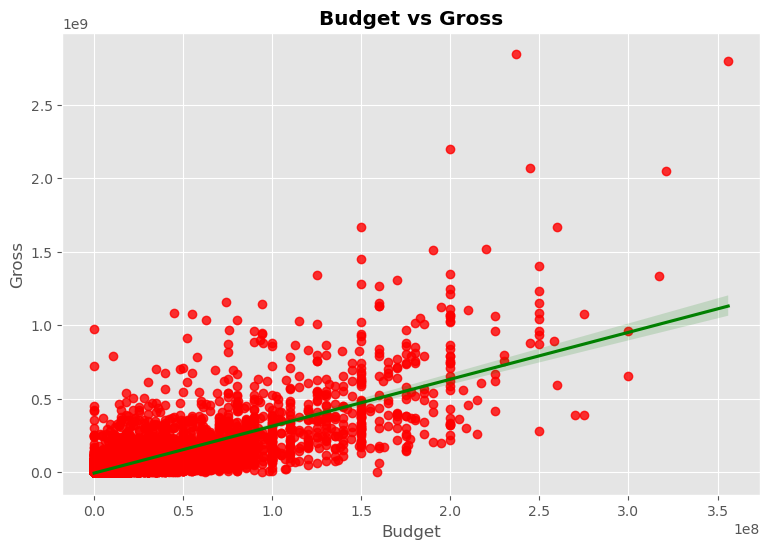

In [8]:
# ploting the Budget vs Gross
plt.figure(figsize=(9, 6))
sns.regplot(data= df, x= 'budget', y= 'gross', scatter_kws= {'color': 'red'}, line_kws= {'color': 'green'} )
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross', fontweight = 'bold')
plt.show()

In [9]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

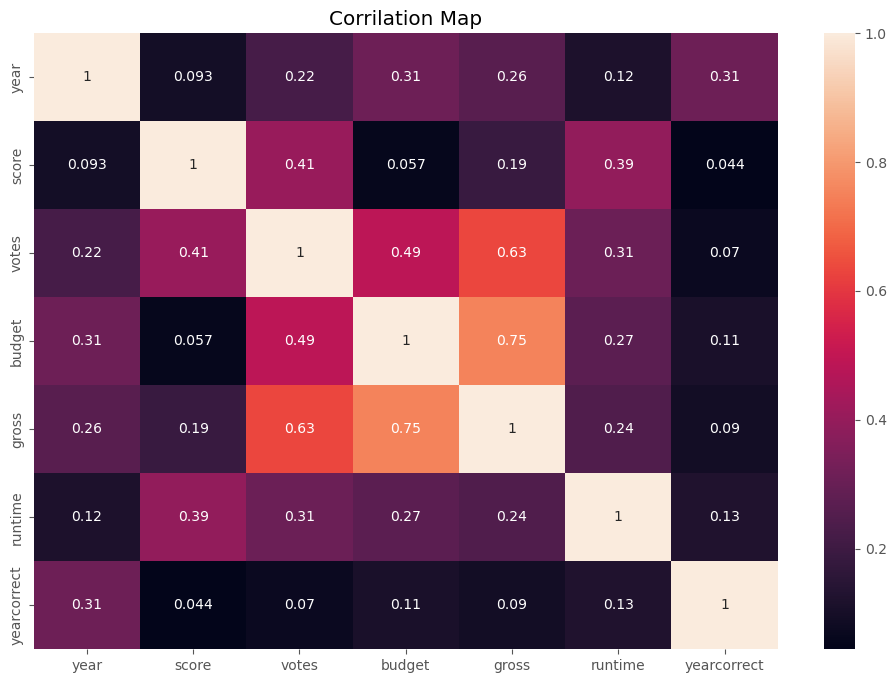

In [10]:
#ploting corrilaation matrix

sns.heatmap(correlation_matrix, annot= True)
plt.title('Corrilation Map')
plt.show()

In [11]:
df_numb = df.copy()
df_1 = df_numb[df.select_dtypes('object').columns]
for c in df_1:
    df_numb[c] = df_numb[c].astype('category') 
    df_numb[c] = df_numb[c].cat.codes

df_numb = df_numb.corr()

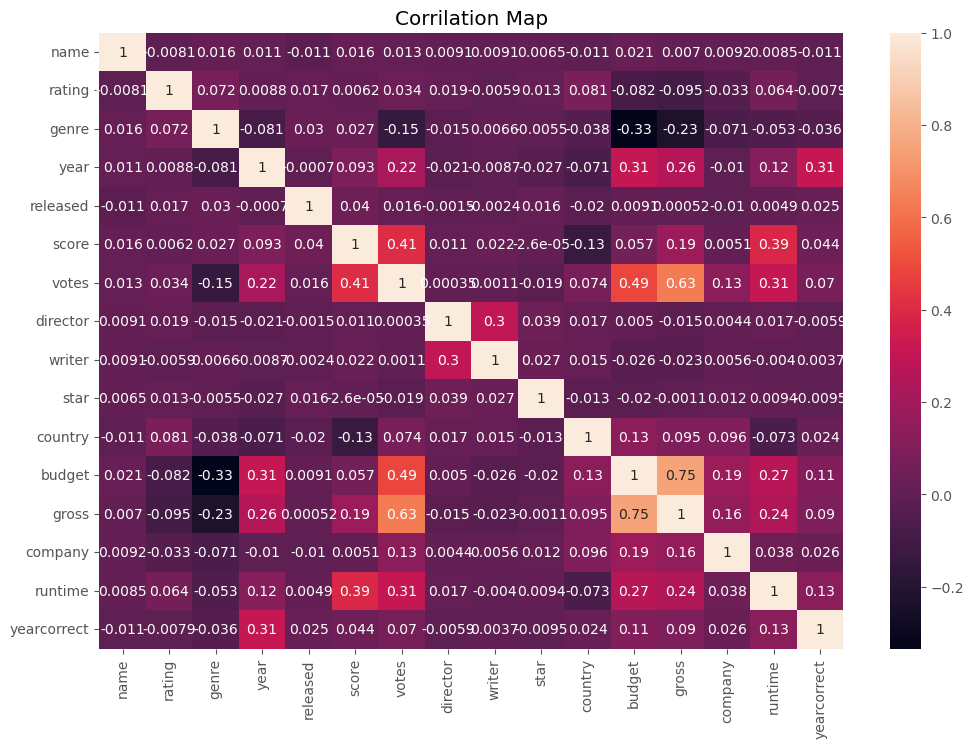

In [12]:
sns.heatmap(df_numb, annot= True)
plt.title('Corrilation Map')
plt.show()

In [13]:
df_numb.unstack().sort_values(ascending= False).iloc[16:26]

budget   gross      0.750157
gross    budget     0.750157
votes    gross      0.632870
gross    votes      0.632870
votes    budget     0.486931
budget   votes      0.486931
votes    score      0.407101
score    votes      0.407101
         runtime    0.394564
runtime  score      0.394564
dtype: float64